IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
random.seed(45)

MOUNTING DRIVE

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FUNCTION DEFINITIONS

In [3]:
def cost_function_L2(X,y,w,lam):
  hypothesis = np.dot(X,w.T)
  J = (1/(2*len(y))) * np.sum((hypothesis - y)**2) + lam*np.sum(w**2)/2
  return J

In [4]:
def batch_gradient_descent(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = (1-alpha*lam)*w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function_L2(X,y,w,lam)
  return w,cost_history

In [5]:
def mini_batch_gradient_descent(X,y,w,alpha,iters,batch_size,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w = (1-alpha*lam)*w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

In [6]:
def stochastic_gradient_descent(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w = (1-alpha*lam)*w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

EVALUATION METRICS

In [7]:
def mean_squared_error(y_hat,y):
  error = (1/len(y)) * np.sum((y_hat - y)**2)
  return error

In [8]:
def mean_absolute_error(y_hat,y):
  error = (1/len(y)) * np.sum(abs(y_hat - y))
  return error

In [9]:
def correlation_coefficient(y_hat,y):
  coef = np.sum((y_hat - y_hat.mean())*(y - y.mean()))/(np.sqrt(np.sum((y_hat-y_hat.mean())**2))*np.sqrt(np.sum((y-y.mean())**2)))
  return coef

DATA PRE-PROCESSING

In [10]:
from random import Random
data = pd.read_excel("/content/gdrive/MyDrive/NNFL_ASSIGNMENT_1/data_q2_q3.xlsx")
Random(14).shuffle(data.values)
Random(14).shuffle(data.values)
Random(10).shuffle(data.values)
X = data.drop("Output",axis=1)
y = data["Output"]
m = len(X)
X_train = X[:int(m*0.7)]
X_val = X[int(m*0.7):int(m*0.8)]
X_test = X[int(m*0.8):]
y_train = y[:int(m*0.7)]
y_val = y[int(m*0.7):int(m*0.8)]
y_test = y[int(m*0.8):]

In [11]:
def Normalise(X):
  mean = X.mean()
  std = np.std(X,axis=0)
  m = len(X)
  X_norm = (X-mean)/std
  X_norm = np.c_[np.ones((m, 1)), X_norm]
  return X_norm
X_norm = Normalise(X_train)

In [12]:
w = np.zeros(X_norm.shape[1])

BATCH GRADIENT DESCENT

In [13]:
def Grid_search_batch(X_train,y_train,X_val,y_val):
  Cost_values = []
  Alpha = []
  Lamda = []
  w = np.zeros(X_train.shape[1])
  for i in list([0.001,0.0001,0.00001]): 
    for j in list([0,0.001,0.01,0.1]):
      batch_w, J_his_batch = batch_gradient_descent(X_train,y_train,w,i,4000,j)
      Cost = cost_function_L2(X_val,y_val,batch_w,j) 
      Cost_values.append(Cost)
      Alpha.append(i)
      Lamda.append(j)

  Min_cost = min(Cost_values)
  Index1 = Cost_values.index(Min_cost)
  Alpha_opt = Alpha[Index1]
  Lamda_opt = Lamda[Index1]

  return Alpha_opt,Lamda_opt

In [14]:
X_val_bias = Normalise(X_val)
alpha_batch,lam_batch = Grid_search_batch(X_norm,y_train,X_val_bias, y_val)

In [15]:
alpha_batch, lam_batch

(0.001, 0)

In [16]:
alpha = alpha_batch
iters = 4000
lam = lam_batch
batch_w, J_his_batch = batch_gradient_descent(X_norm,y_train,w,alpha,iters,lam)

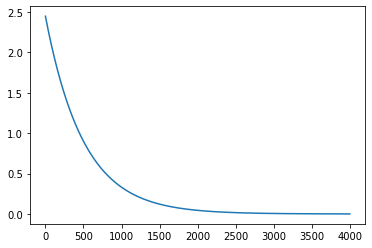

In [17]:
plt.plot(range(iters),J_his_batch)
plt.show()

In [18]:
X_test_norm = Normalise(X_test)
print('mean_squared_error :',mean_squared_error(np.dot(X_test_norm,batch_w.T),y_test))
print('mean_absolute_error :',mean_absolute_error(np.dot(X_test_norm,batch_w.T),y_test))
print('correlation_coefficient :',correlation_coefficient(np.dot(X_test_norm,batch_w.T),y_test))

mean_squared_error : 0.002975098730606225
mean_absolute_error : 0.05157498543962749
correlation_coefficient : 0.9345129125328898


MINI-BATCH GRADEINT DESCENT

In [19]:
def Grid_search_mini(X_train,y_train,X_val,y_val):
  Cost_values = []
  Alpha = []
  Lamda = []
  w = np.zeros(X_train.shape[1])
  for i in list([0.001,0.0001,0.00001]): 
    for j in list([0,0.001,0.01,0.1]):
      mini_batch_w, J_his_mini_batch = mini_batch_gradient_descent(X_train,y_train,w,i,4000,10,j)
      Cost = cost_function_L2(X_val,y_val,mini_batch_w,j) 
      Cost_values.append(Cost)
      Alpha.append(i)
      Lamda.append(j)

  Min_cost = min(Cost_values)
  Index1 = Cost_values.index(Min_cost)
  Alpha_opt = Alpha[Index1]
  Lamda_opt = Lamda[Index1]

  return Alpha_opt,Lamda_opt

In [20]:
X_val_bias = Normalise(X_val)
alpha_mini,lam_mini = Grid_search_mini(X_norm,y_train,X_val_bias, y_val)

In [21]:
alpha = alpha_mini
iters = 4000
batch_size = 10
lam = lam_mini
mini_batch_w, J_his_mini_batch = mini_batch_gradient_descent(X_norm,y_train,w,alpha,iters,batch_size,lam)

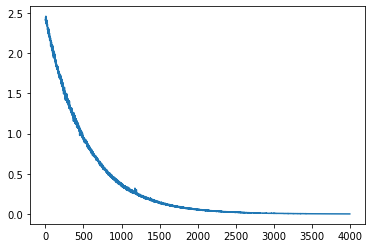

In [22]:
plt.plot(range(iters),J_his_mini_batch)
plt.show()

In [23]:
X_test_norm = Normalise(X_test)
print('mean_squared_error :',mean_squared_error(np.dot(X_test_norm,mini_batch_w.T),y_test))
print('mean_absolute_error :',mean_absolute_error(np.dot(X_test_norm,mini_batch_w.T),y_test))
print('correlation_coefficient :',correlation_coefficient(np.dot(X_test_norm,mini_batch_w.T),y_test))

mean_squared_error : 0.003981203398817424
mean_absolute_error : 0.0612186698754827
correlation_coefficient : 0.942968072166642


STOCHASTIC GRADIENT DESCENT

In [24]:
def Grid_search_stochastic(X_train,y_train,X_val,y_val):
  Cost_values = []
  Alpha = []
  Lamda = []
  w = np.zeros(X_train.shape[1])
  for i in list([0.001,0.0001,0.00001]): 
    for j in list([0,0.001,0.01,0.1]):
      stochastic_w, J_his_stochastic = stochastic_gradient_descent(X_train,y_train,w,i,4000,j)
      Cost = cost_function_L2(X_val,y_val,stochastic_w,j) 
      Cost_values.append(Cost)
      Alpha.append(i)
      Lamda.append(j)

  Min_cost = min(Cost_values)
  Index1 = Cost_values.index(Min_cost)
  Alpha_opt = Alpha[Index1]
  Lamda_opt = Lamda[Index1]

  return Alpha_opt,Lamda_opt

In [25]:
X_val_bias = Normalise(X_val)
alpha_stochastic,lam_stochastic = Grid_search_stochastic(X_norm,y_train,X_val_bias, y_val)

In [26]:
alpha = alpha_stochastic
lam = lam_stochastic
iters = 4000
stochastic_w, J_his_stochastic = stochastic_gradient_descent(X_norm,y_train,w,alpha,iters, lam)

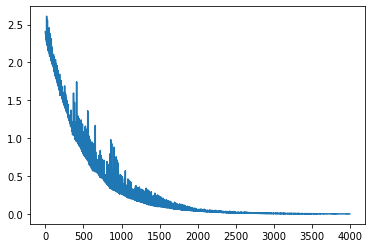

In [27]:
plt.plot(range(iters),J_his_stochastic)
plt.show()

In [28]:
X_test_norm = Normalise(X_test)
print('mean_squared_error :',mean_squared_error(np.dot(X_test_norm,stochastic_w.T),y_test))
print('mean_absolute_error :',mean_absolute_error(np.dot(X_test_norm,stochastic_w.T),y_test))
print('correlation_coefficient :',correlation_coefficient(np.dot(X_test_norm,stochastic_w.T),y_test))

mean_squared_error : 0.0030812442427072067
mean_absolute_error : 0.05133898999937419
correlation_coefficient : 0.9114540629262169


CHECKING OUTPUT WITH SCKITLEARN

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_norm, y_train)
a = reg.coef_

In [30]:
from scipy.stats import pearsonr
corr, _ = pearsonr(np.dot(X_test_norm,a.T),y_test)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.938
